In [16]:
library(data.table) 
library(plyr)
library(Seurat)
library(ggplot2)
library(repr)

## Visualisation of HTODemux result

In [17]:
# Load htodemux result from an rds object
htodemux_gx12 <- readRDS("../data/pipeline_output/gx12/htodemux.rds")

### tSNE plot

Warning message:
"Requested number is larger than the number of available items (6). Setting to 6."
Warning message:
"Requested number is larger than the number of available items (6). Setting to 6."
Warning message:
"Requested number is larger than the number of available items (6). Setting to 6."
Warning message:
"Requested number is larger than the number of available items (6). Setting to 6."
Warning message:
"Requested number is larger than the number of available items (6). Setting to 6."
PC_ 1 
Positive:  Hash453-TotalSeqA, Hash452-TotalSeqA, Hash451-TotalSeqA 
Negative:  Hash454-TotalSeqA, Hash455-TotalSeqA, Hash456-TotalSeqA 
PC_ 2 
Positive:  Hash456-TotalSeqA, Hash455-TotalSeqA, Hash454-TotalSeqA 
Negative:  Hash452-TotalSeqA, Hash451-TotalSeqA, Hash453-TotalSeqA 
PC_ 3 
Positive:  Hash451-TotalSeqA, Hash454-TotalSeqA, Hash456-TotalSeqA 
Negative:  Hash452-TotalSeqA, Hash453-TotalSeqA, Hash455-TotalSeqA 
PC_ 4 
Positive:  Hash456-TotalSeqA, Hash454-TotalSeqA, Hash453-TotalSe

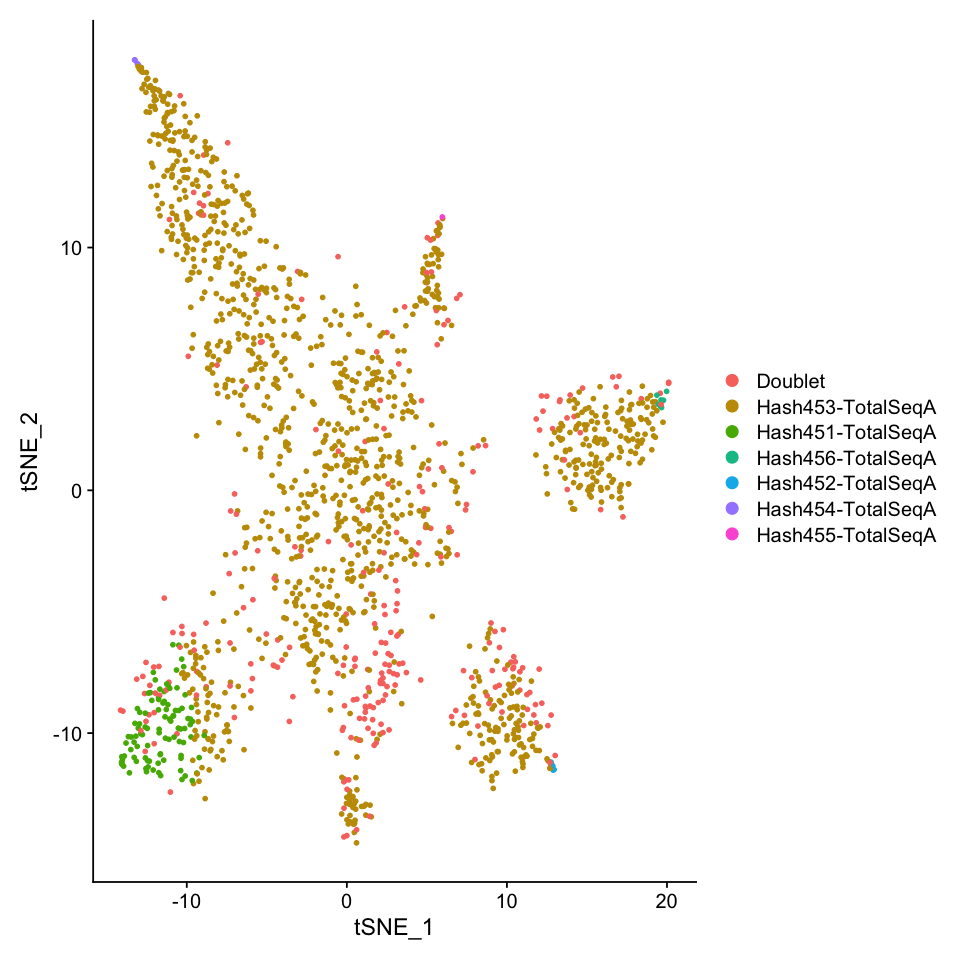

In [18]:
# Subset the object, remove negative droplets
htodemux_gx12.subset <- subset(htodemux_gx12, idents = "Negative", invert = TRUE)

# Calculate a tSNE embedding of the HTO data
DefaultAssay(htodemux_gx12.subset) <- "HTO"
htodemux_gx12.subset <- ScaleData(htodemux_gx12.subset, features = rownames(htodemux_gx12.subset),
    verbose = FALSE)
htodemux_gx12.subset <- RunPCA(htodemux_gx12.subset, features = rownames(htodemux_gx12.subset), approx = FALSE)
htodemux_gx12.subset <- RunTSNE(htodemux_gx12.subset, dims = 1:6, perplexity = 100)
DimPlot(htodemux_gx12.subset) 

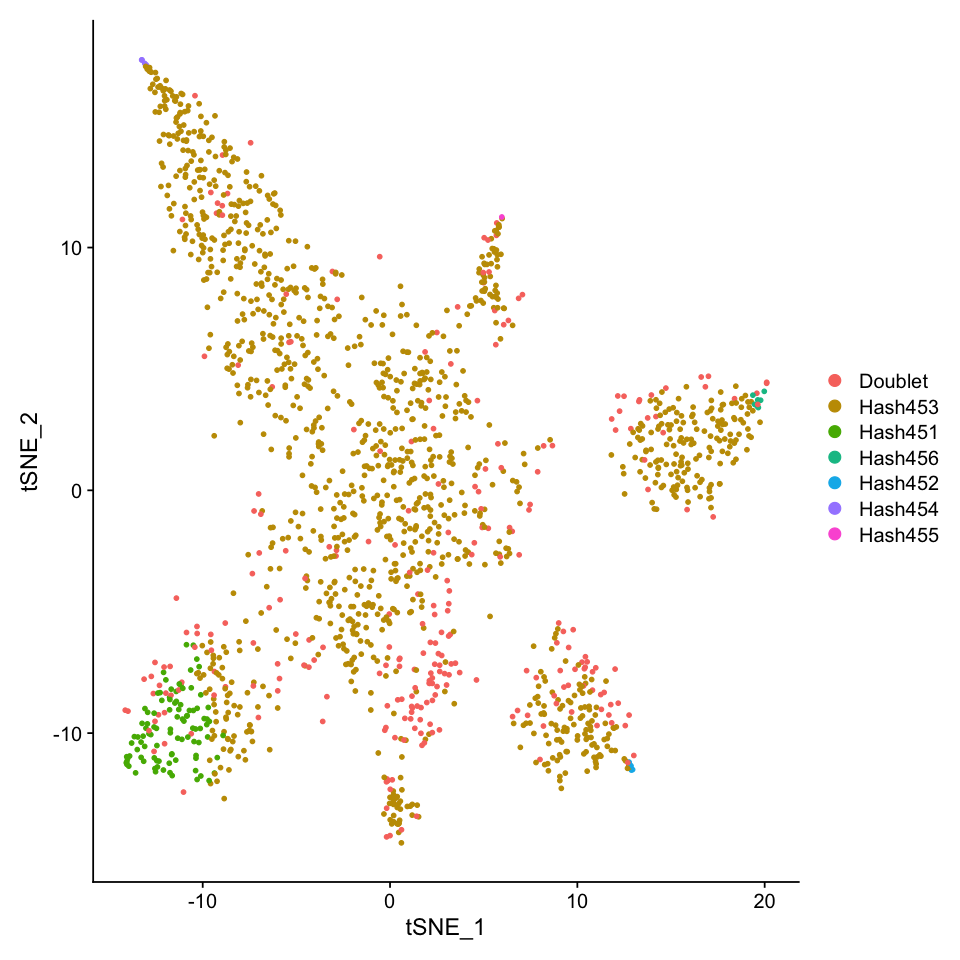

In [19]:
# Rename the features
DimPlot(htodemux_gx12.subset) + scale_color_hue(labels = c("Doublet", paste0("Hash45", c(3,1,6,2,4,5))))
# ggsave("tsne_gx12.png", dpi = 300, height = 5, width = 7)

### Ridge plot

In [20]:
# Change plot size to 8 x 8
options(repr.plot.width=8, repr.plot.height=8)

In [21]:
# Rename features
htodemux_gx12[["HTO"]]@counts@Dimnames[[1]] <- paste0("Hash45", 1:6)
dimnames(htodemux_gx12[["HTO"]]@data)[[1]] <- paste0("Hash45", 1:6)
htodemux_gx12 <- RenameIdents(htodemux_gx12, 'Hash453-TotalSeqA' = 'Hash453', 'Hash451-TotalSeqA' = 'Hash451', 'Hash452-TotalSeqA' = 'Hash452', 'Hash454-TotalSeqA' = 'Hash454',
    'Hash455-TotalSeqA' = 'Hash455', 'Hash456-TotalSeqA' = 'Hash456')

Picking joint bandwidth of 0.0666

Picking joint bandwidth of 0.0486

Picking joint bandwidth of 0.0383

Picking joint bandwidth of 0.0456

Picking joint bandwidth of 0.0165

Picking joint bandwidth of 0.047



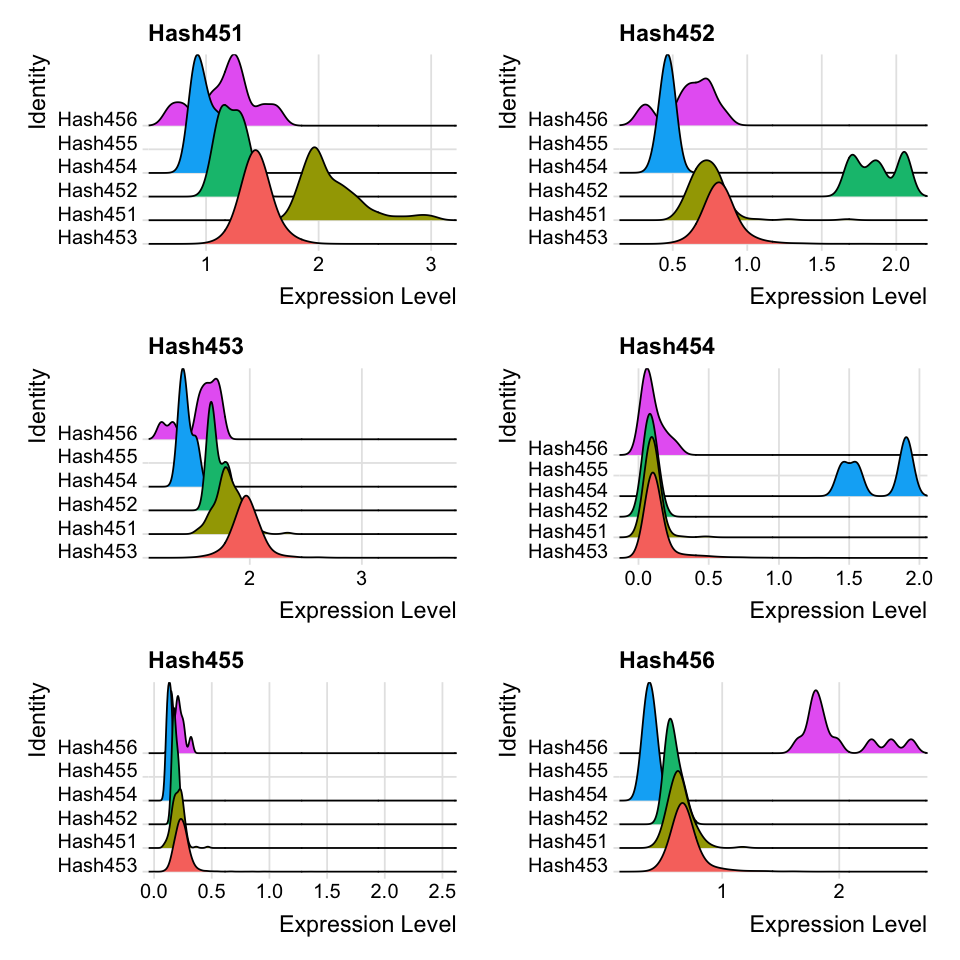

In [22]:
# Group cells based on the max HTO signal
Idents(htodemux_gx12) <- "HTO_maxID"
htodemux_gx12 <- RenameIdents(htodemux_gx12, 'Hash453-TotalSeqA' = 'Hash453', 'Hash451-TotalSeqA' = 'Hash451', 'Hash452-TotalSeqA' = 'Hash452', 'Hash454-TotalSeqA' = 'Hash454',
    'Hash455-TotalSeqA' = 'Hash455', 'Hash456-TotalSeqA' = 'Hash456')
RidgePlot(htodemux_gx12, assay = "HTO", features = paste0("Hash45", 1:6), ncol = 2) 
# ggsave("ridge_gx12.png", dpi = 300, height = 7, width = 9)

### heatmap

Warning message in HTOHeatmap(htodemux_gx12, assay = "HTO"):
"ncells (5000) is larger than the number of cells present in the provided object (4878). Plotting heatmap for all cells."
Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.


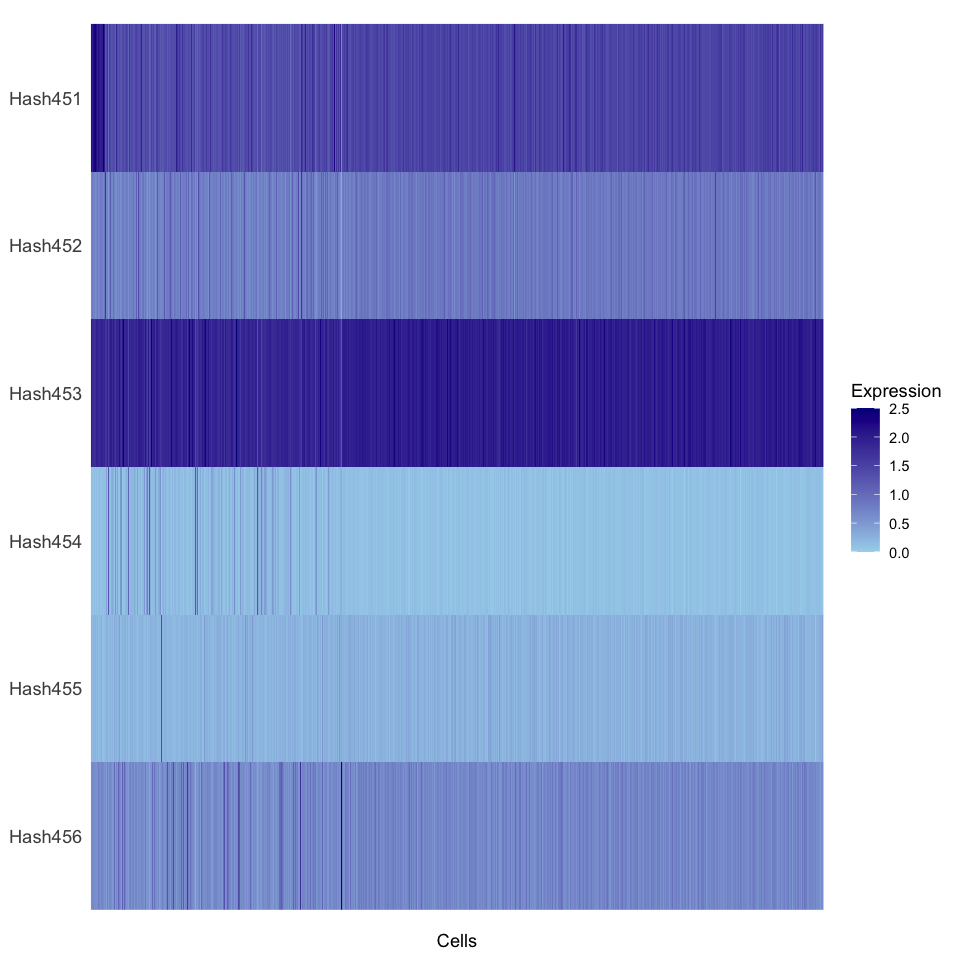

In [23]:
# Rename features
htodemux_gx12[["HTO_classification"]]$HTO_classification <- gsub('-TotalSeqA', '', htodemux_gx12[["HTO_classification"]]$HTO_classification)

HTOHeatmap(htodemux_gx12, assay = "HTO") + xlab("Cells") + scale_fill_gradient(low = "#a6d5ed", high = "darkblue", guide = "colorbar") + 
    theme(axis.text=element_text(size=11))
# ggsave("heatmap_gx12.png", dpi = 300, height = 5, width = 7)

## Visualisation of hashing deconvolution results

In [24]:
# Load hashing deconvolution results
hash_gx12_classi <-fread("../data/pipeline_output/gx12/hash_classification_all.csv")

# Remove the trial ID
colnames(hash_gx12_classi) <- gsub("_1", "", colnames(hash_gx12_classi))

# Subset by only those cells detected by RNA
white_list_gx12 <- fread("../data/dataset/barcodes_gx12.tsv", header = F)$V1
hash_gx12_classi <- hash_gx12_classi[Barcode %in% white_list_gx12,]

head(hash_gx12_classi)

Barcode,demuxem,hashedDrops,hashsolo,htodemux,multiseq,solo
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
AAACCCAAGGTGTGAC-1,singlet,negative,singlet,singlet,singlet,singlet
AAACCCAGTGAGAGGG-1,singlet,NA,singlet,negative,doublet,doublet
AAACGAAAGAATCTAG-1,negative,negative,singlet,negative,negative,singlet
AAACGAACACATATGC-1,singlet,negative,singlet,negative,negative,singlet
AAACGAACACGACTAT-1,singlet,negative,singlet,singlet,singlet,doublet
AAACGAACATCAGCAT-1,negative,negative,singlet,singlet,negative,doublet


In [25]:
# Reorder the result
summary_hash_gx12 <- melt(hash_gx12_classi, id.vars = "Barcode", variable.name = "Method", 
                          value.name = "Classification")
summary_hash_gx12 <- na.omit(summary_hash_gx12)
summary_hash_gx12 <- as.data.frame(table(summary_hash_gx12[,-1]))
colnames(summary_hash_gx12)[3] <- "Count" 
summary_hash_gx12 <- summary_hash_gx12[order(summary_hash_gx12$Classification, decreasing = T),]
head(summary_hash_gx12)

,Method,Classification,Count
,<fct>,<fct>,<int>
13,demuxem,singlet,1812
14,hashedDrops,singlet,32
15,hashsolo,singlet,4686
16,htodemux,singlet,1402
17,multiseq,singlet,1853
18,solo,singlet,2604


Warning message:
"Removed 2 rows containing missing values (`geom_text()`)."


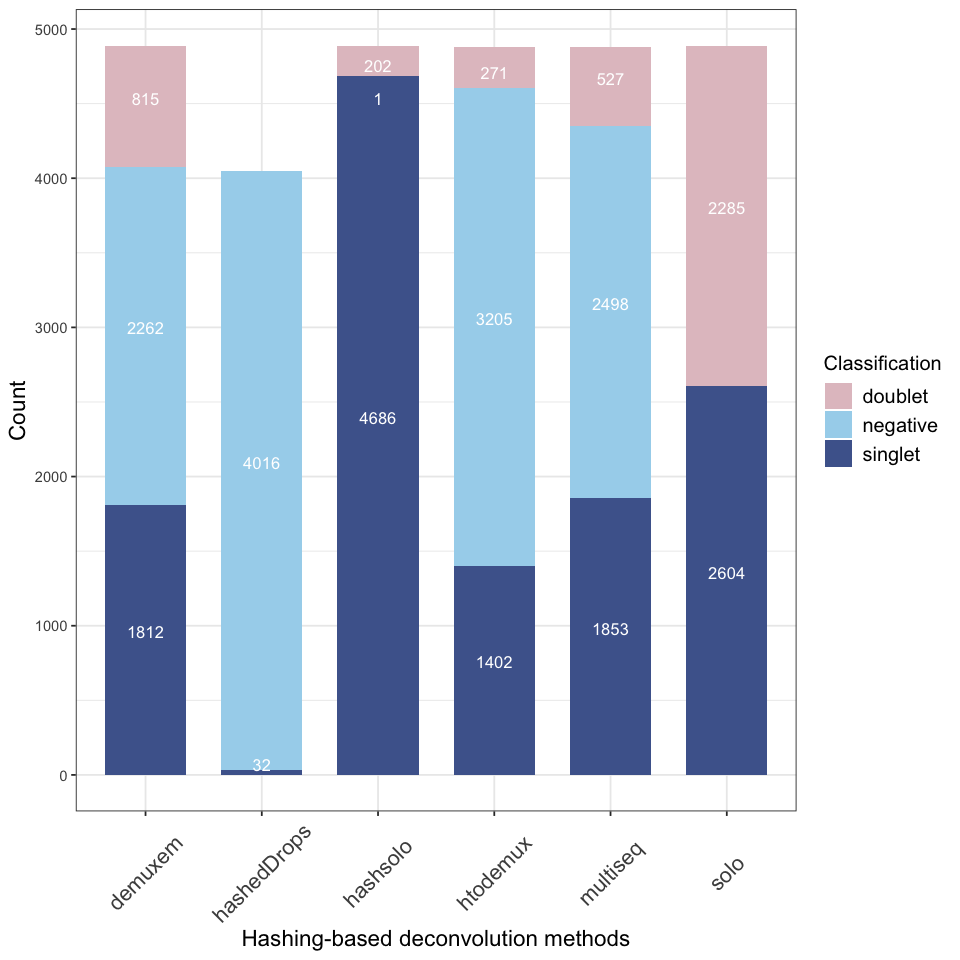

In [26]:
# Determine the y-axis position of labels ylab_pos
summary_hash_gx12_cumsum <- ddply(summary_hash_gx12, "Method", transform, label_ypos=cumsum(Count)- 0.5*Count)

# Modify the ylab_pos manually
summary_hash_gx12_cumsum[summary_hash_gx12_cumsum$Method=="hashsolo" & 
                         summary_hash_gx12_cumsum$Classification=="doublet",]$label_ypos <- 4700
summary_hash_gx12_cumsum[summary_hash_gx12_cumsum$Method=="hashsolo" & 
                         summary_hash_gx12_cumsum$Classification=="negative",]$label_ypos <- 4480
summary_hash_gx12_cumsum[summary_hash_gx12_cumsum$Method=="htodemux" & 
                         summary_hash_gx12_cumsum$Classification=="doublet",]$label_ypos <- 4650

# Avoid showing count 0
summary_hash_gx12_cumsum[summary_hash_gx12_cumsum$Count==0,]$label_ypos <- NA

# Barplot
ggplot(summary_hash_gx12_cumsum, aes(x=Method, y=Count, fill=Classification)) +
  geom_bar(stat="identity", width=0.7) + scale_fill_manual(values = c("#E2C3C9", "#a6d5ed", "#4e659b")) + 
  theme_bw() + theme(axis.title=element_text(size=13.5)) + xlab("Hashing-based deconvolution methods") +
  geom_text(aes(y=label_ypos, label=Count), vjust=-0.2, color="white", size=3.5) +
    theme(axis.text.x = element_text(angle = 45, vjust = 0.5, size = 13),
    legend.text=element_text(size=12),
    legend.title=element_text(size=12))

# ggsave("hash_bar_gx12.png", dpi = 300, height = 5, width = 7)

## Visualisation of genetic deconvolution results

In [27]:
# Load genetic demultiplexing results
gene_gx12_classi <-fread("../data/pipeline_output/gx12/genetic_classification_all.csv")

# Remove the trial ID
colnames(gene_gx12_classi) <- gsub("_1", "", colnames(gene_gx12_classi))

# Reorder the result
summary_gene_gx12 <- melt(gene_gx12_classi, id.vars = "Barcode", variable.name = "Method", 
                          value.name = "Classification")
summary_gene_gx12 <- na.omit(summary_gene_gx12)
summary_gene_gx12 <- as.data.frame(table(summary_gene_gx12[,-1]))
colnames(summary_gene_gx12)[3] <- "Count" 
summary_gene_gx12 <- summary_gene_gx12[order(summary_gene_gx12$Classification, decreasing = T),]
head(summary_gene_gx12)

,Method,Classification,Count
,<fct>,<fct>,<int>
9,freemuxlet,singlet,4590
10,scsplit,singlet,4445
11,souporcell,singlet,4465
12,vireo,singlet,4377
5,freemuxlet,negative,7
6,scsplit,negative,0


Warning message:
"Removed 1 rows containing missing values (`geom_text()`)."


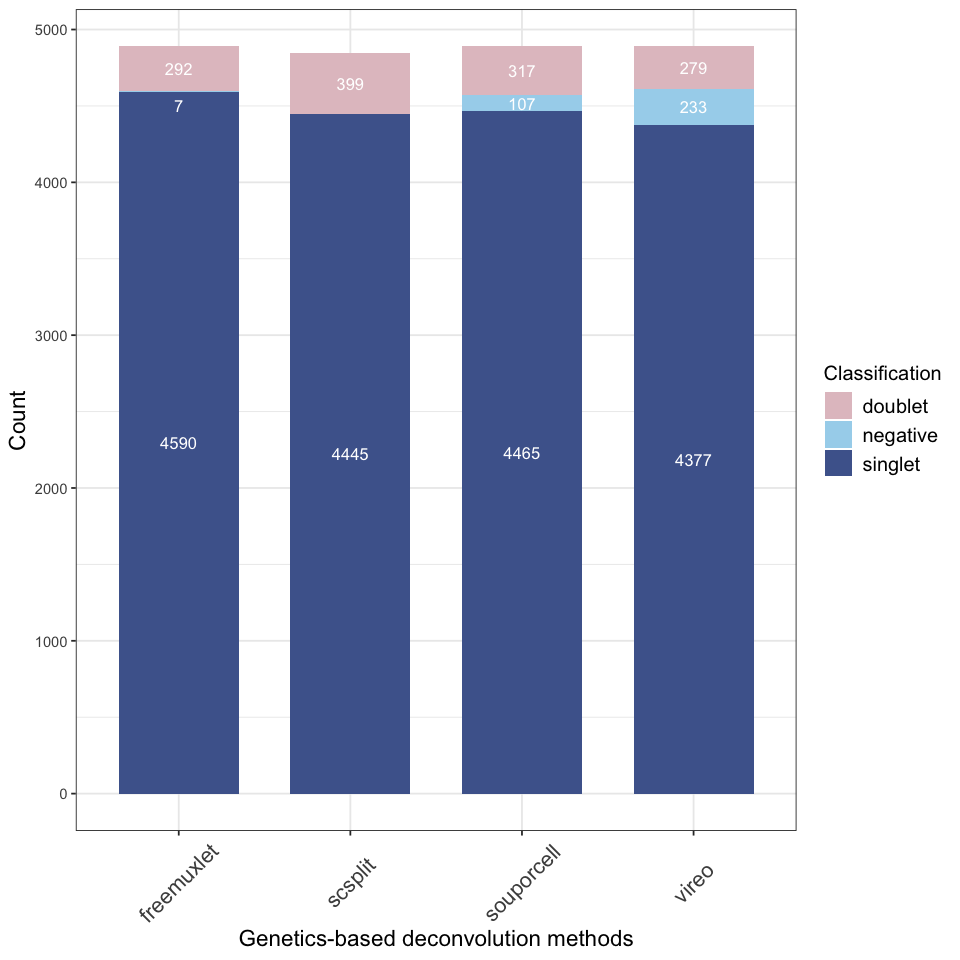

In [28]:
# Determine the y-axis position of labels ylab_pos
summary_gene_gx12_cumsum <- ddply(summary_gene_gx12, "Method", transform, 
                                  label_ypos=cumsum(Count)- 0.5*Count)

# Avoid showing count 0
summary_gene_gx12_cumsum[summary_gene_gx12_cumsum$Count==0,]$label_ypos <- NA

# Modify the ylab_pos manually
summary_gene_gx12_cumsum[summary_gene_gx12_cumsum$Method=="freemuxlet" & 
                         summary_gene_gx12_cumsum$Classification=="negative",]$label_ypos <- 4500

# Barplot
ggplot(summary_gene_gx12_cumsum, aes(x=Method, y=Count, fill=Classification)) +
    geom_bar(stat="identity", width=0.7) + scale_fill_manual(values = c("#E2C3C9", "#a6d5ed", "#4e659b")) + 
    theme_bw() + theme(axis.title=element_text(size=13.5)) + xlab("Genetics-based deconvolution methods") +
    geom_text(aes(y=label_ypos, label=Count), vjust=0.5, color="white", size=3.5) +
    theme(axis.text.x = element_text(angle = 45, vjust = 0.5, size = 13),
    legend.text=element_text(size=12),
    legend.title=element_text(size=12))

# ggsave("gene_bar_gx12.png", dpi = 300, height = 5, width = 7)